# Modelo de lenguaje Cooccurrence



In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk import bigrams, word_tokenize
from nltk.corpus import stopwords
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

#Descargar las stopwords 
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#Leer datos desde el archivo CSV
corpus = pd.read_csv('Valence_test_oc_es.csv', sep=';', on_bad_lines='skip')
corpus

,ID,Tweet,Dimension,Intensity,Description
0,2018-Es-00766,Dios que susto lpmmm 🙏😡,valence,-2,se infiere un estado emocional moderadamente n...
1,2018-Es-01333,Que lindo que es viajar en moto vieja,valence,2,se infiere un estado emocional moderadamente p...
2,2018-Es-06190,que ansiedad de mierda vo,valence,-3,se infiere un estado emocional muy negativo
3,2018-Es-05144,La ansiedad no desaprovecha ni un segundo.,valence,-2,se infiere un estado emocional moderadamente n...
4,2018-Es-04187,@ts8rr8t Mucho gusto.,valence,2,se infiere un estado emocional moderadamente p...
...,...,...,...,...,...
224,2018-Es-02893,Ustedes que saben de terror si sus hij@s no le...,valence,-1,se infiere un estado emocional ligeramente neg...
225,2018-Es-03654,@AmorVIPcom Un gusto..,valence,1,se infiere un estado emocional ligeramente pos...
226,2018-Es-01556,@elespanolcom A lo loco!!! ¿Lo próximo qué ser...,valence,-3,se infiere un estado emocional muy negativo
227,2018-Es-06385,@the_os_07 @globovision tiburón eres un enchuf...,valence,-2,se infiere un estado emocional moderadamente n...


In [3]:
#Lista de stopwords en español
stop_words = set(stopwords.words('spanish'))

def generate_co_occurrence_matrix(corpus):
    #Tokenizar el corpus y eliminar stopwords 
    filtered_corpus = [
        [word for word in word_tokenize(sentence.lower()) if word not in stop_words and len(word) > 3]
        for sentence in corpus
    ]

    #Crear bigrams a partir de las palabras filtradas
    bi_grams = list(itertools.chain(*[list(bigrams(sentence)) for sentence in filtered_corpus]))

    #Crear vocabulario a partir del corpus filtrado
    vocab = list(set(itertools.chain(*filtered_corpus)))
    vocab_index = {word: i for i, word in enumerate(vocab)}

    #Inicializar la matriz de co-ocurrencia
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))

    #Iterar a través de los bigrams tomando la palabra actual y la palabra anterior, y el número de ocurrencias del bigram.
    for bigram in bi_grams:
        current = bigram[1]
        previous = bigram[0]
        pos_current = vocab_index.get(current, None)
        pos_previous = vocab_index.get(previous, None)
        if pos_current is not None and pos_previous is not None:
            co_occurrence_matrix[pos_current][pos_previous] += 1
            co_occurrence_matrix[pos_previous][pos_current] += 1

    #Eliminar valores iguales a 0
    co_occurrence_matrix = np.where(co_occurrence_matrix > 0, co_occurrence_matrix, 0)

    #Retornar la matriz y el índice
    return co_occurrence_matrix, vocab_index

#Crear una lista de textos desde el corpus
data = list(corpus['Tweet'])

#Generar la matriz de co-ocurrencia y el índice de vocabulario
matrix, vocab_index = generate_co_occurrence_matrix(data)

#Crear un DataFrame para mostrar la matriz de co-ocurrencia 
data_matrix = pd.DataFrame(matrix, index=vocab_index, columns=vocab_index)
print(data_matrix)

              jajja  tatuaje  caes  desaprovecha  buena  salto  ¡cómo  \
jajja           0.0      0.0   0.0           0.0    0.0    0.0    0.0   
tatuaje         0.0      0.0   0.0           0.0    0.0    0.0    0.0   
caes            0.0      0.0   0.0           0.0    0.0    0.0    0.0   
desaprovecha    0.0      0.0   0.0           0.0    0.0    0.0    0.0   
buena           0.0      0.0   0.0           0.0    0.0    0.0    0.0   
...             ...      ...   ...           ...    ...    ...    ...   
hablaba         0.0      0.0   0.0           0.0    0.0    0.0    0.0   
cnstituyente    0.0      0.0   0.0           0.0    0.0    0.0    0.0   
guido           0.0      0.0   0.0           0.0    0.0    0.0    0.0   
amigas          0.0      0.0   0.0           0.0    0.0    0.0    0.0   
curiouscat      0.0      0.0   0.0           0.0    0.0    0.0    0.0   

              argentina  semáforo  enojado  ...  anemia  ilennita  ultimate  \
jajja               0.0       0.0      0.0  

<Axes: >

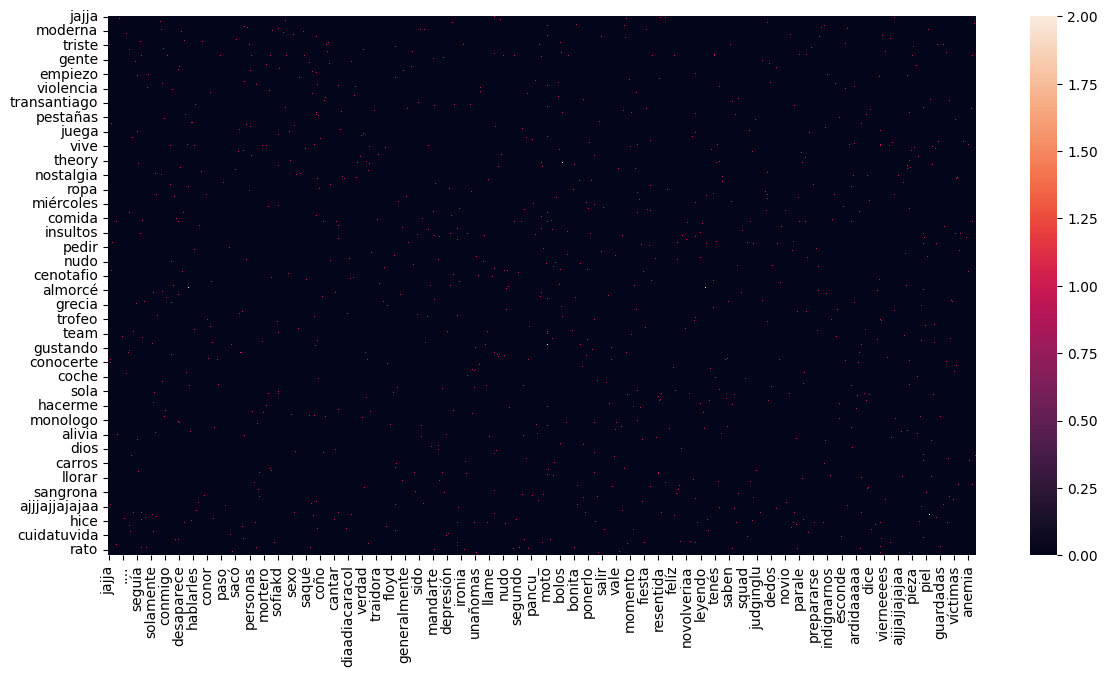

In [4]:
#Configura el tamaño del grafico
plt.figure(figsize=(14,7))

#Se usa seaborn para la creacion de la representacion de los valores
sns.heatmap(data_matrix)

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Py

<Figure size 1400x700 with 0 Axes>

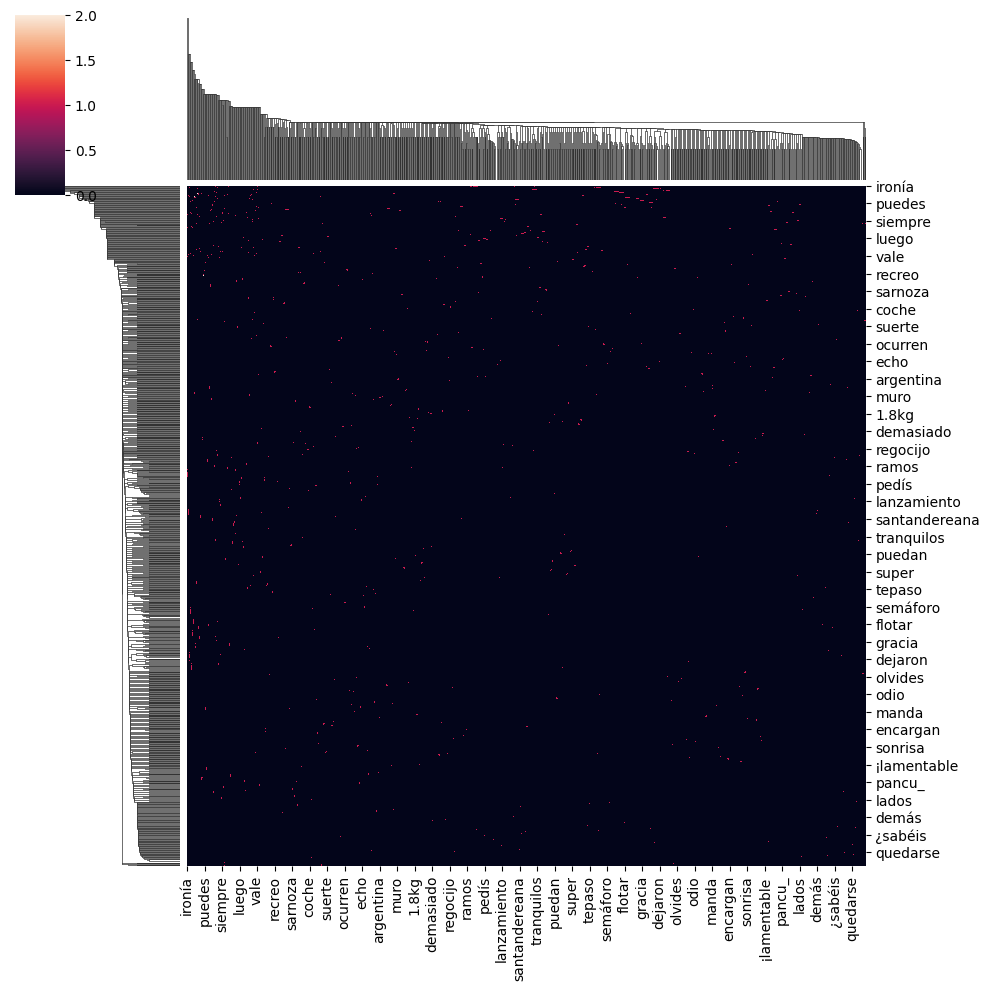

In [5]:
#Configura el tamaño del grafico
plt.figure(figsize=(14,7))

#Se usa seaborn para la creacion de la representacion de los valores
sns.clustermap(data_matrix)